In [ ]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

In [3]:
dataDir='data/train/images'
annFile='xview_instance_segmentation_dataset_val.json'

In [4]:
dataDir_mass='data/mass_buildings/train/input'
annFile_mass = 'mass_buildings_annotations.json'
dataDir_mass_2='data/mass_buildings'



In [5]:
# initialize COCO api for instance annotations
coco=COCO(annFile_mass)

loading annotations into memory...
Done (t=1.25s)
creating index...
index created!


In [6]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
building

COCO supercategories: 
building


In [7]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['building']);
imgIds = coco.getImgIds(catIds=catIds );
# imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [8]:
img

{u'file_name': u'data/mass_buildings/train/target/22978975_15.tif',
 u'height': 1500,
 u'id': 50,
 u'width': 1500}

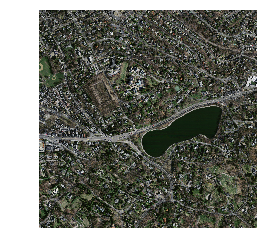

In [13]:
# load and display image
I = io.imread('%s'%(img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

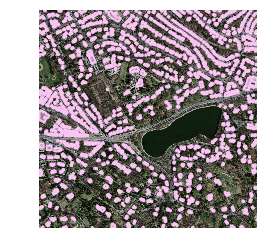

In [14]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)